In [1]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5)

In [4]:
# Standardize the data (data preprocessing step)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train the Naive Bayes Classifier using cross-validation
nb = GaussianNB()
y_pred = cross_val_predict(nb, X_scaled, y, cv=skf)

In [6]:
# Evaluate the model
report = classification_report(y, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [7]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred)

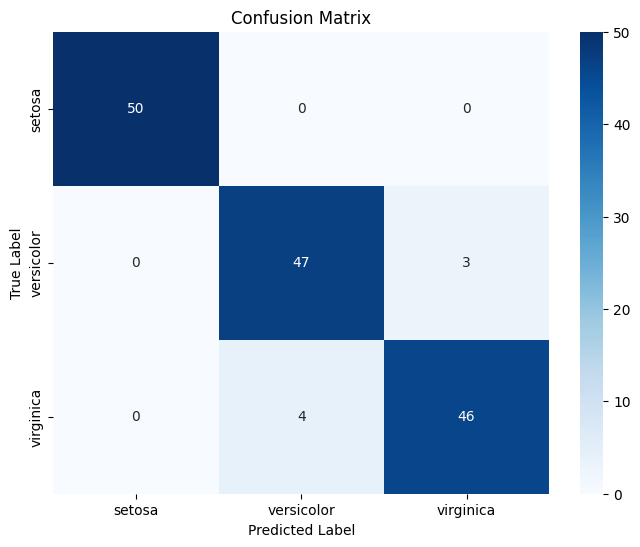

In [8]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()